In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt


In [5]:
dataset_path = '/content/drive/MyDrive/Garbage classification/Garbage classification'
os.listdir(dataset_path)

['paper', 'glass', 'trash', 'metal', 'cardboard', 'plastic']

In [6]:
img_list = glob.glob(os.path.join(dataset_path,'*/*.jpg'))

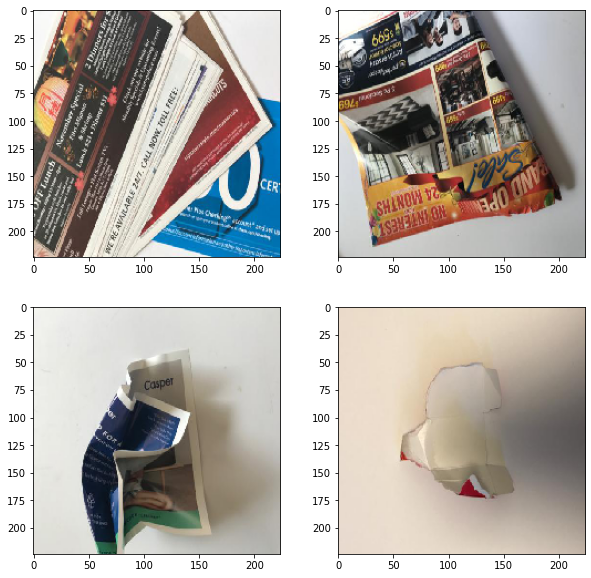

In [7]:
plt.figure(figsize=(10,10))
for i in range(0,4):
  img = tf.keras.preprocessing.image.load_img(img_list[i+1],target_size=(224,224))
  img = tf.keras.preprocessing.image.img_to_array(img,dtype=np.uint8)
  plt.subplot(2,2,i+1)
  plt.imshow(img)

In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [9]:
train_generator = train_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

Found 2276 images belonging to 6 classes.


In [10]:
test_generator = test_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 251 images belonging to 6 classes.


In [11]:
model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False, weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [12]:
model.trainable=False
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [13]:
myModel = tf.keras.Sequential(
    [
     model,
     tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.GlobalAveragePooling2D(),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(6,activation='softmax')
    ]
)

In [14]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 128)         1474688   
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 3,733,446
Trainable params: 1,475,462
Non-trainable params: 2,257,984
______________________________________

In [15]:
myModel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [17]:
myModel.fit(train_generator,validation_data=test_generator,epochs=10,batch_size=32)

Epoch 1/10
143/143 [==============================] - 31s 217ms/step - loss: 0.2781 - accuracy: 0.8959 - val_loss: 0.4962 - val_accuracy: 0.8287
Epoch 2/10
143/143 [==============================] - 31s 214ms/step - loss: 0.2407 - accuracy: 0.9038 - val_loss: 0.5129 - val_accuracy: 0.8606
Epoch 3/10
143/143 [==============================] - 31s 214ms/step - loss: 0.2617 - accuracy: 0.9011 - val_loss: 0.4647 - val_accuracy: 0.8566
Epoch 4/10
143/143 [==============================] - 31s 215ms/step - loss: 0.2538 - accuracy: 0.9011 - val_loss: 0.5631 - val_accuracy: 0.8367
Epoch 5/10
143/143 [==============================] - 31s 214ms/step - loss: 0.2795 - accuracy: 0.8959 - val_loss: 0.5862 - val_accuracy: 0.8327
Epoch 6/10
143/143 [==============================] - 31s 215ms/step - loss: 0.2213 - accuracy: 0.9174 - val_loss: 0.5751 - val_accuracy: 0.8088
Epoch 7/10
143/143 [==============================] - 31s 215ms/step - loss: 0.2432 - accuracy: 0.9126 - val_loss: 0.5106 - val_ac